In [19]:
import pandas as pd
import matplotlib.pyplot as plt

cicids2017.csv is the complete cicids dataset, all original csv files are merged into a single one

Index(['Unnamed: 0', 'Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
     

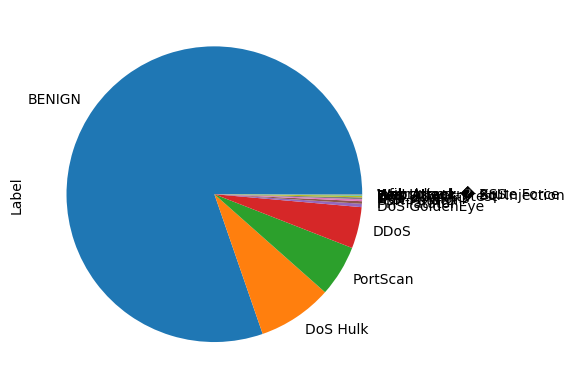

In [20]:
cicids2017_dataframe = pd.read_csv("~/Documents/Jupyter-Lab-Projects/Pcap-Analysis/CICIDS2017-DecisionTree/cicids2017.csv")
cicids2017_dataframe.columns = cicids2017_dataframe.columns.str.lstrip()
print(cicids2017_dataframe.columns)
print(cicids2017_dataframe.shape)
labels = cicids2017_dataframe['Label']
print(labels.value_counts())
print(labels.value_counts().plot.pie())

BENIGN    2273097
ATTACK     557646
Name: Label, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)


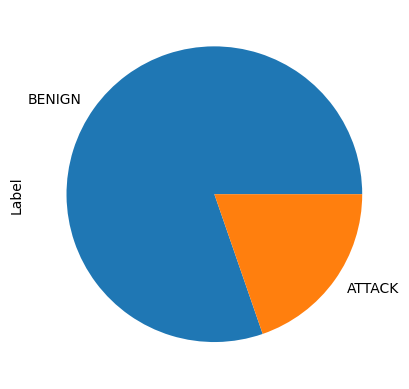

In [21]:
for label in labels:
    if (label != 'BENIGN' and label != 'ATTACK'):
        cicids2017_dataframe['Label'].replace(label, 'ATTACK', inplace=True)
        
labels = cicids2017_dataframe['Label']
print(labels.value_counts())
print(labels.value_counts().plot.pie())

In [22]:
normals = cicids2017_dataframe.loc[cicids2017_dataframe['Label'] == 'BENIGN']
len(normals)
normals.head()

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,54865,3,2,0,12,0,6,6,6.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,1,55054,109,1,1,6,6,6,6,6.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,2,55055,52,1,1,6,6,6,6,6.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,3,46236,34,1,1,6,6,6,6,6.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,4,54863,3,2,0,12,0,6,6,6.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [23]:
normals = normals.drop(columns=normals.columns[0])
normals.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [24]:
# uncomment if you dont want the target vector 
#print(normals.columns)
#normals = normals.drop(columns=normals.columns[78])
#print(normals.columns)

In [25]:
normals_sampled = normals.sample(frac=0.1, random_state=1)
normals_sampled.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
815471,58990,55,1,1,0,0,0,0,0.000000,0.000000,...,32,0.00000,0.000000,0,0,0.0,0.000000,0,0,BENIGN
637328,443,115325273,23,20,3165,5320,1396,0,137.608696,400.096890,...,32,62362.63636,86363.076210,322757,36214,10000000.0,16339.869660,10000000,9960003,BENIGN
229046,53,200,2,2,64,196,32,32,32.000000,0.000000,...,32,0.00000,0.000000,0,0,0.0,0.000000,0,0,BENIGN
1479934,53,23640,1,1,45,201,45,45,45.000000,0.000000,...,20,0.00000,0.000000,0,0,0.0,0.000000,0,0,BENIGN
852667,443,118148548,13,13,578,4657,192,0,44.461538,65.865539,...,32,119771.00000,117630.041478,202948,36594,58936321.0,44324.281472,58967663,58904979,BENIGN


In [26]:
normals_sampled.to_csv('cic_dataset.csv', index=False)

In [27]:
normals_df = pd.read_csv('cic_dataset.csv')
print(len(normals_df))
normals_df.head()

227310


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,58990,55,1,1,0,0,0,0,0.000000,0.000000,...,32,0.00000,0.000000,0,0,0.0,0.000000,0,0,BENIGN
1,443,115325273,23,20,3165,5320,1396,0,137.608696,400.096890,...,32,62362.63636,86363.076210,322757,36214,10000000.0,16339.869660,10000000,9960003,BENIGN
2,53,200,2,2,64,196,32,32,32.000000,0.000000,...,32,0.00000,0.000000,0,0,0.0,0.000000,0,0,BENIGN
3,53,23640,1,1,45,201,45,45,45.000000,0.000000,...,20,0.00000,0.000000,0,0,0.0,0.000000,0,0,BENIGN
4,443,118148548,13,13,578,4657,192,0,44.461538,65.865539,...,32,119771.00000,117630.041478,202948,36594,58936321.0,44324.281472,58967663,58904979,BENIGN
